In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_excel('data.xlsx')

# Display the first few rows of the dataset
print(data.head())

# Get the shape of the dataset
print(f"Shape of the dataset: {data.shape}")

# Get summary statistics of the data
print(data.describe())


  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1         

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


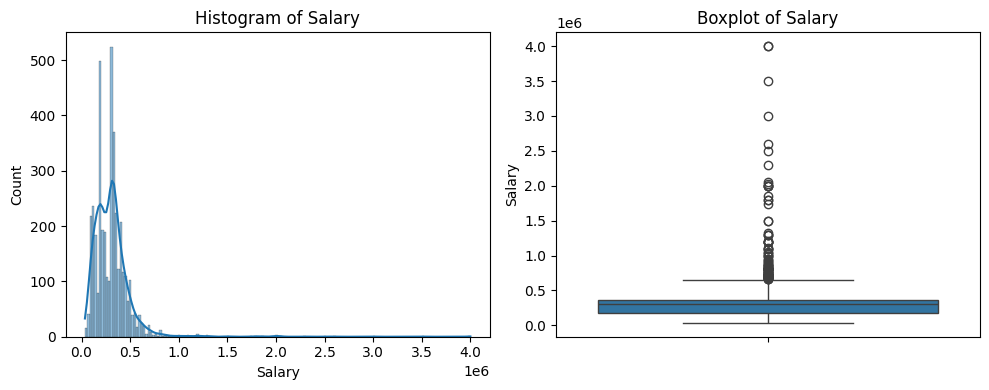

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


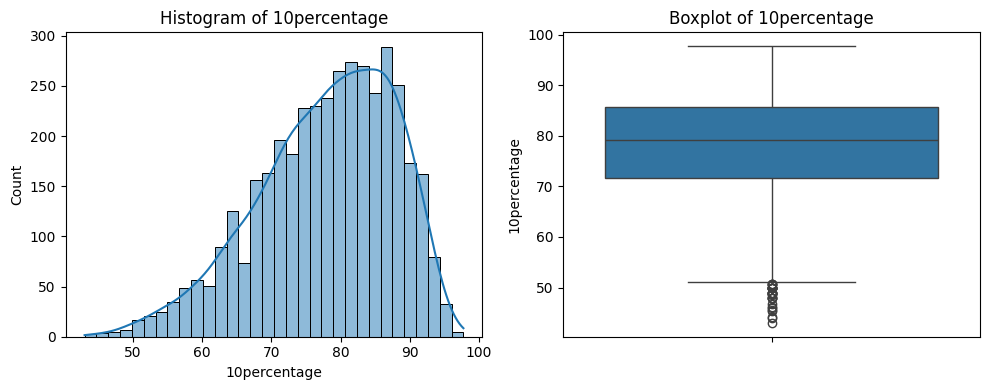

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


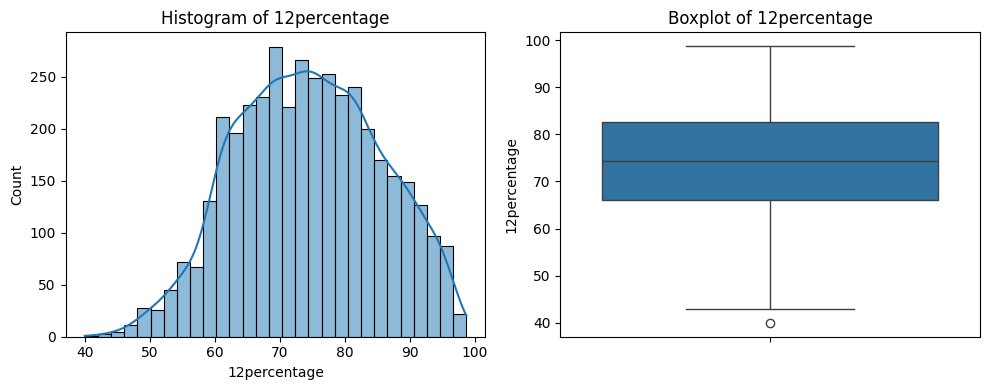

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


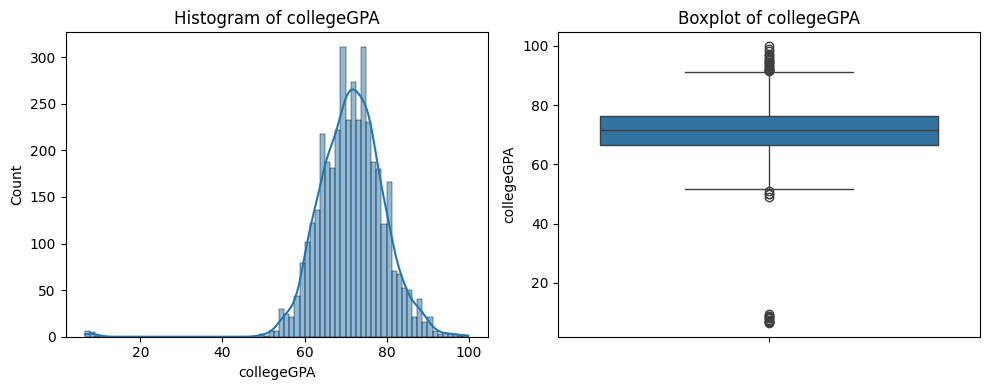

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


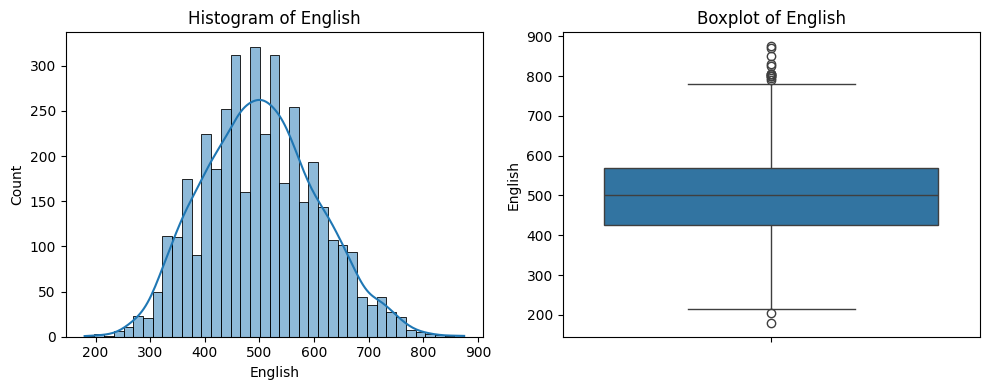

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


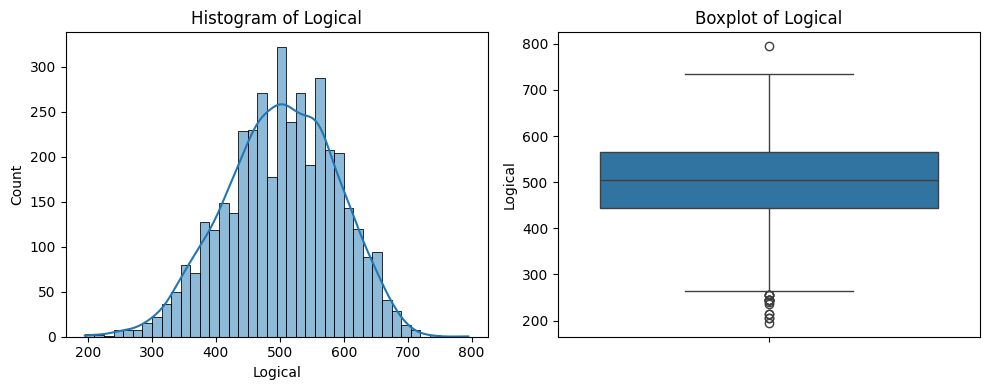

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


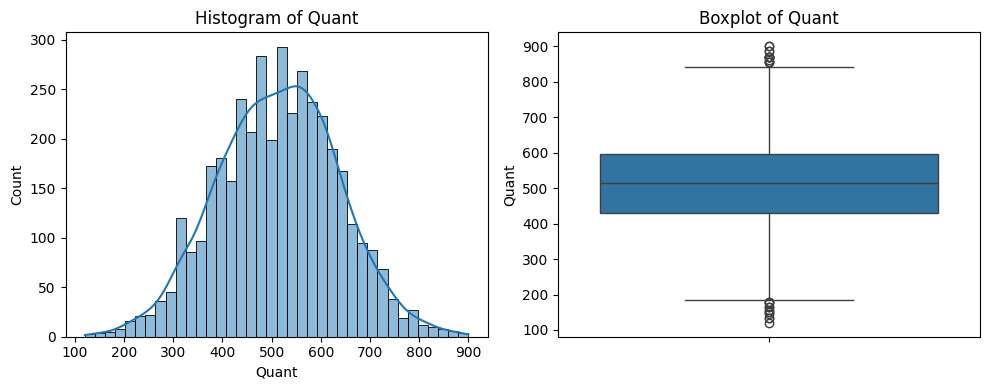

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


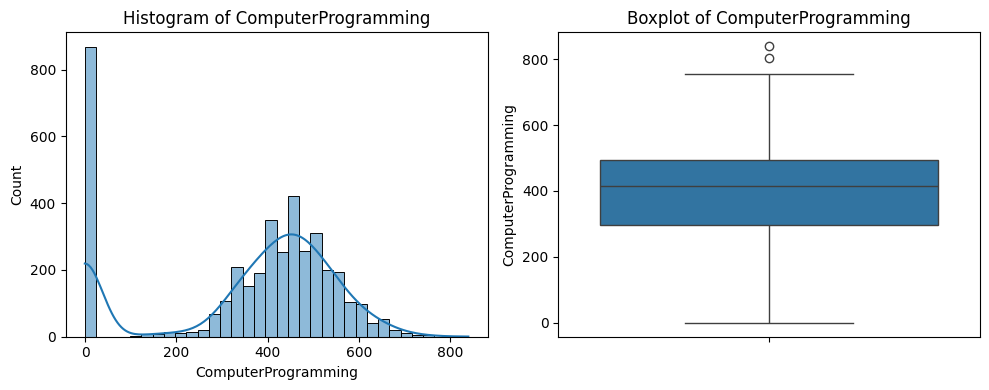

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
num_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA',
               'English', 'Logical', 'Quant', 'ComputerProgramming']

# Histograms
for col in num_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


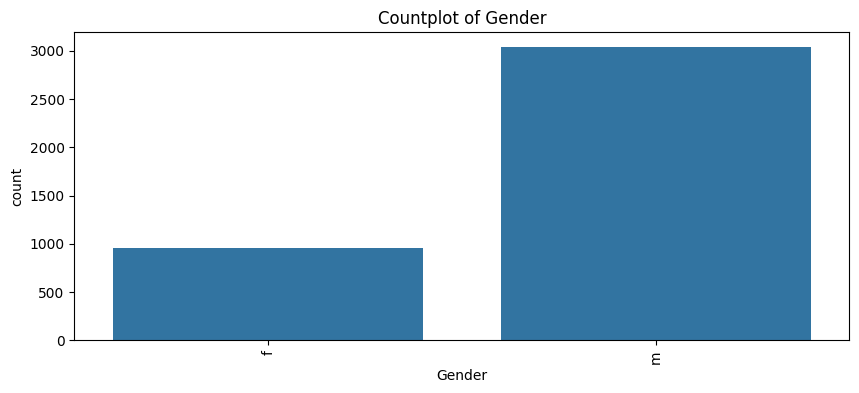

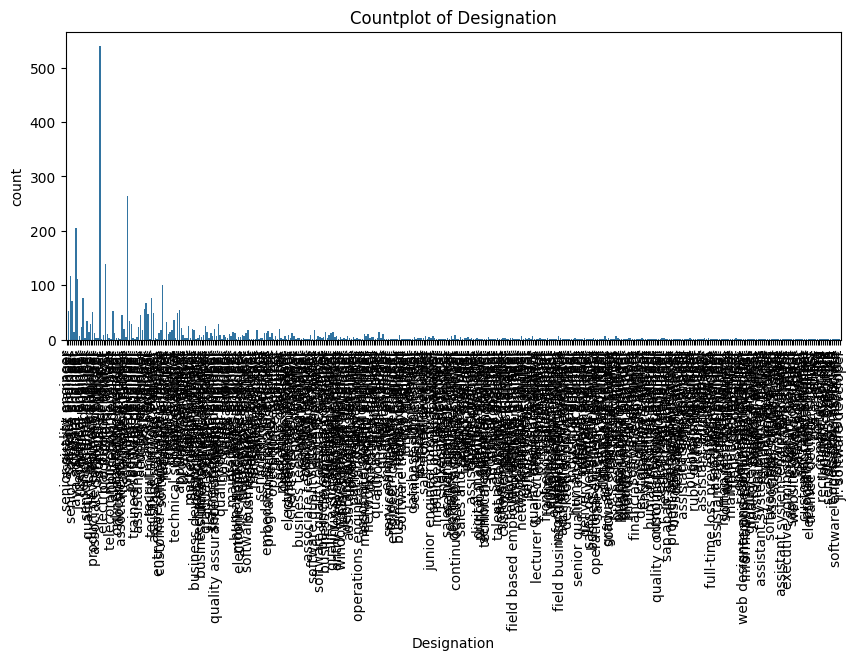

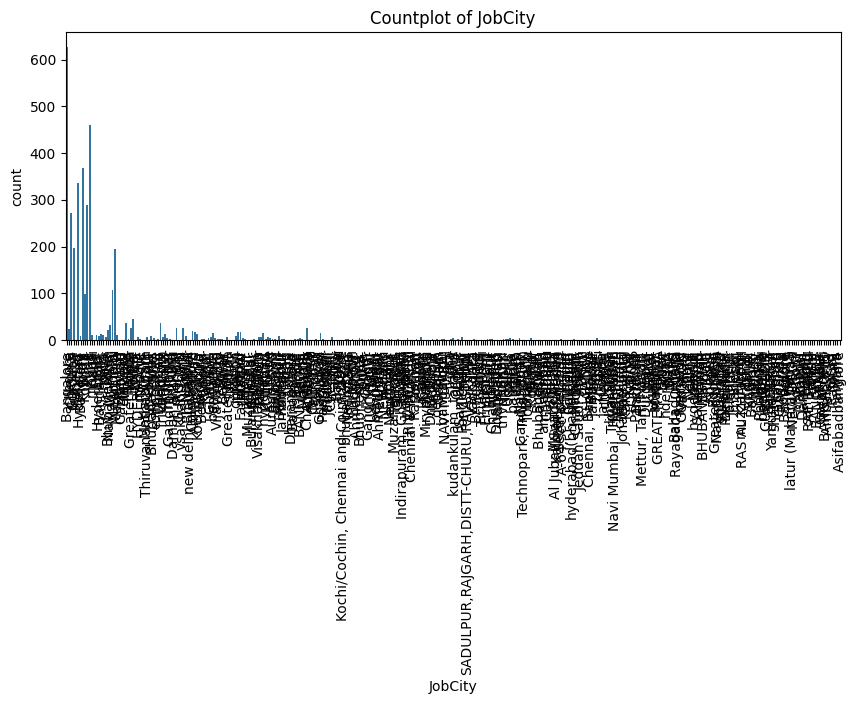

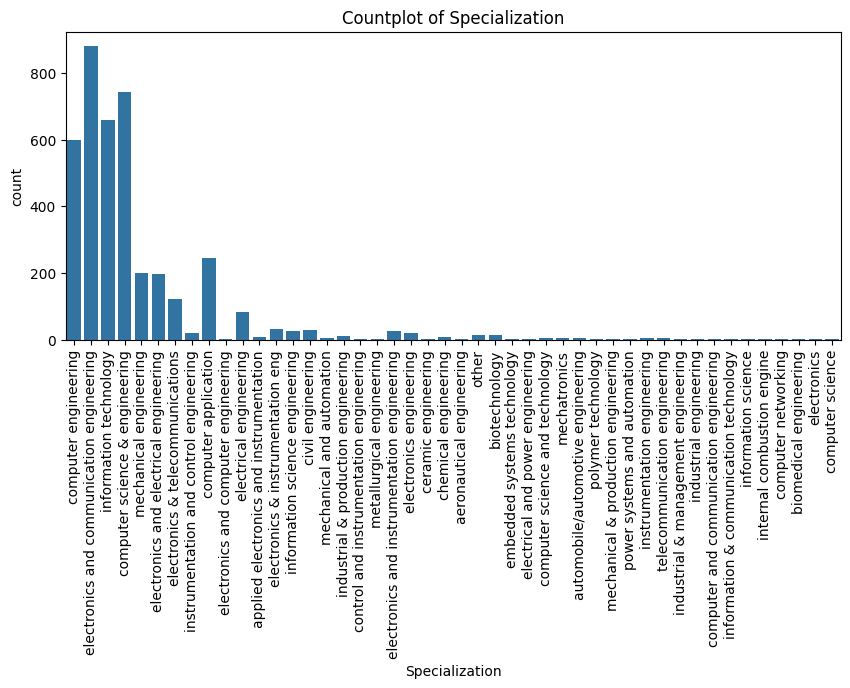

In [9]:
# List of categorical columns
cat_columns = ['Gender', 'Designation', 'JobCity', 'Specialization']

# Countplots
for col in cat_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col)
    plt.xticks(rotation=90)
    plt.title(f'Countplot of {col}')
    plt.show()


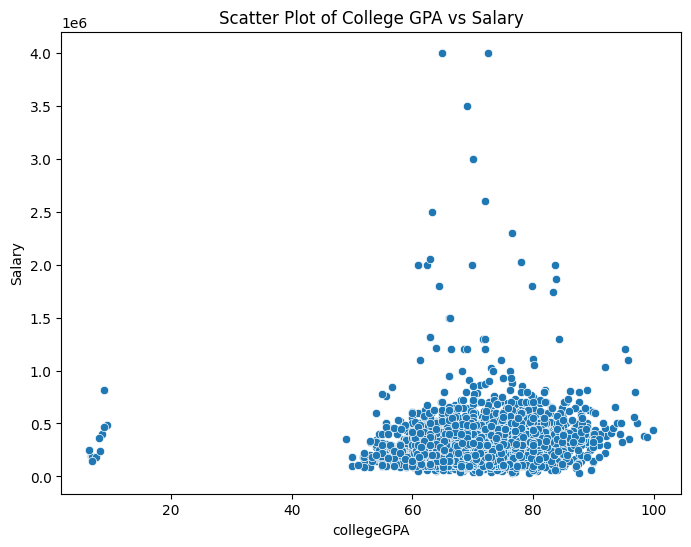

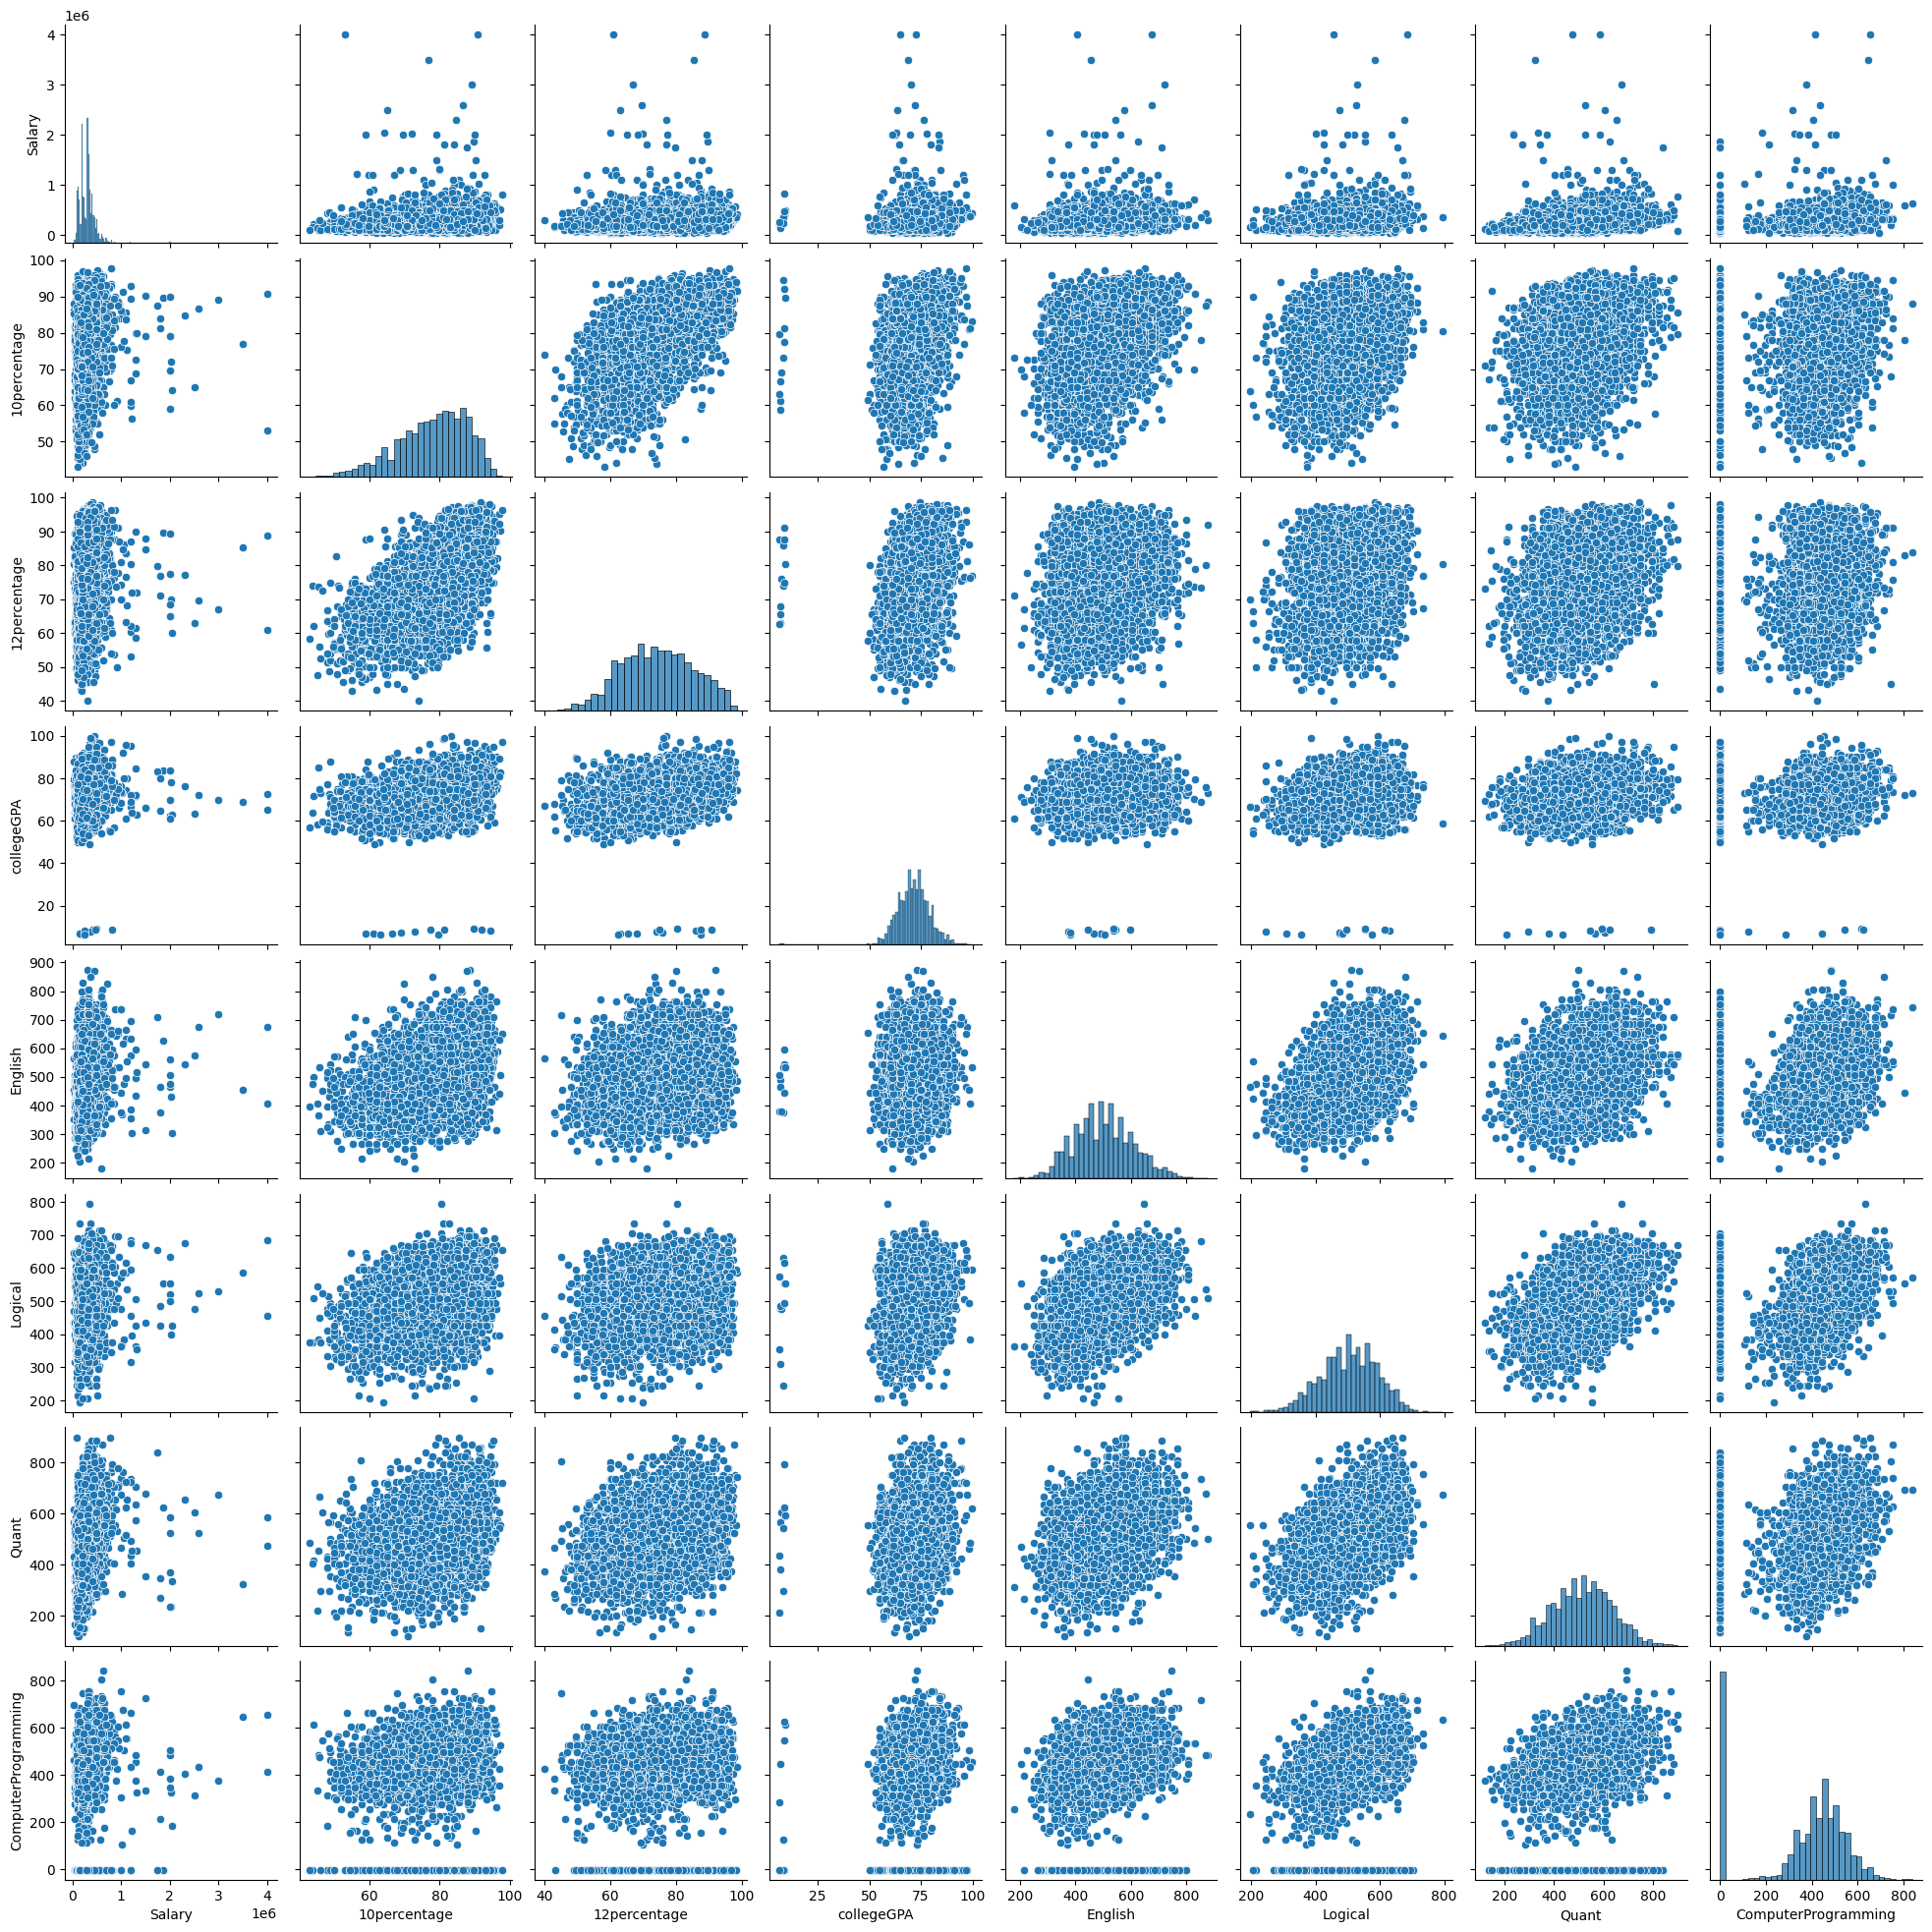

In [11]:
# Scatter plot for Salary vs CollegeGPA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['collegeGPA'], y=data['Salary'])
plt.title('Scatter Plot of College GPA vs Salary')
plt.show()

# Pairplot for all numerical columns
sns.pairplot(data[num_columns])
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


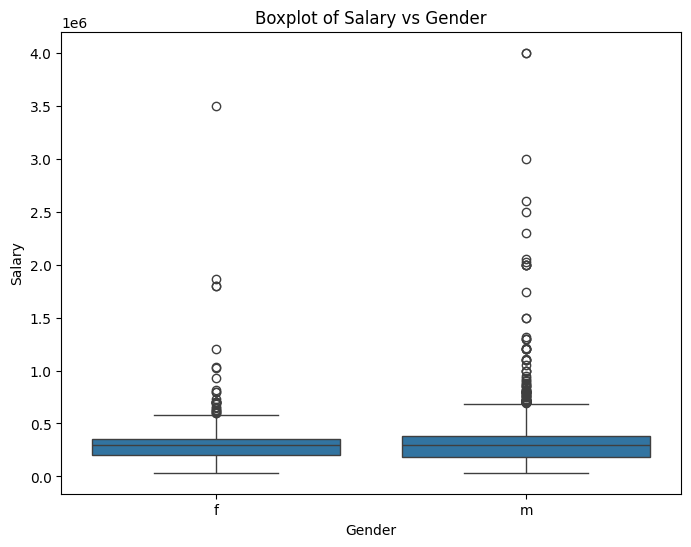

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


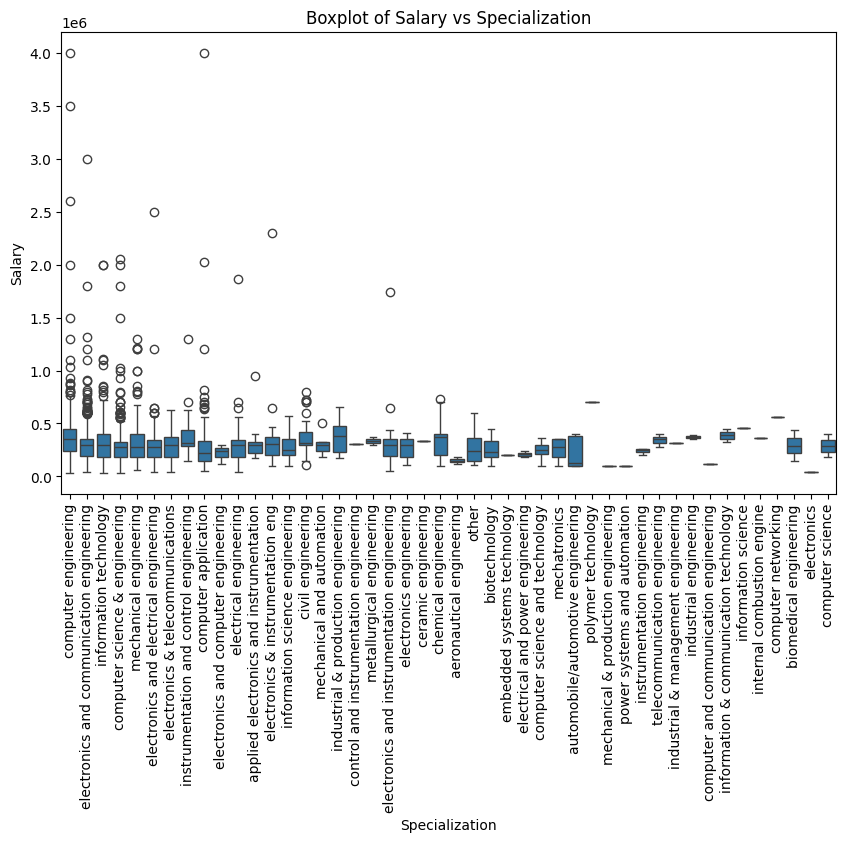

In [12]:
# Boxplot for Salary vs Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Boxplot of Salary vs Gender')
plt.show()

# Boxplot for Salary vs Specialization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Specialization', y='Salary', data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Salary vs Specialization')
plt.show()


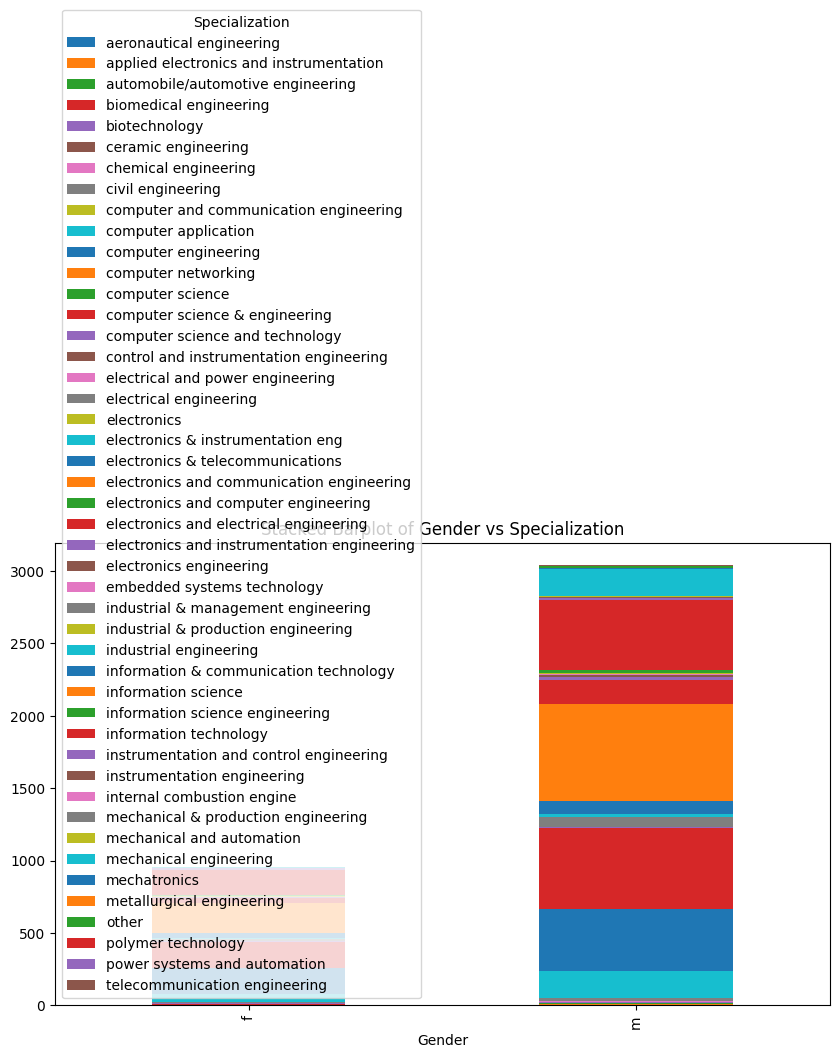

In [15]:
# Stacked barplot for Gender vs Specialization
gender_specialization = pd.crosstab(data['Gender'], data['Specialization'])
gender_specialization.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Barplot of Gender vs Specialization')
plt.show()


In [23]:
# Filter the data for relevant job roles
relevant_roles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
role_filter = data['Designation'].isin(relevant_roles)

# Further filter based on the salary range 2.5 - 3 lakhs (in INR)
salary_filter = (data['Salary'] >= 250000) & (data['Salary'] <= 300000)

# Apply the filter
filtered_grads = data[role_filter & salary_filter]

# Calculate the percentage of relevant graduates within this salary range
total_relevant_grads = data[role_filter]

if len(total_relevant_grads) > 0:
    percentage = (len(filtered_grads) / len(total_relevant_grads)) * 100
    print(f"Percentage of graduates in relevant roles earning 2.5-3 lakhs: {percentage:.2f}%")
else:
    print("No graduates found with the relevant job titles.")


Percentage of graduates in relevant roles earning 2.5-3 lakhs: 14.47%


In [28]:
# Create a contingency table to count occurrences of each specialization by gender
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])

# Calculate overall preference for each specialization
overall_counts = contingency_table.sum(axis=0)  # Sum counts for each specialization

# Total male and female counts
total_males = contingency_table.loc['m'].sum() if 'm' in contingency_table.index else 0
total_females = contingency_table.loc['f'].sum() if 'f' in contingency_table.index else 0

# Determine overall preference based on total counts
if total_males > total_females:
    overall_pref = "Male"
    statement = "True"
elif total_females > total_males:
    overall_pref = "Female"
    statement = "True"
else:
    overall_pref = "Equal"
    statement = "False"

# Final statement about overall preference
final_statement = f"Overall preference indicates that {'males' if overall_pref == 'Male' else 'females' if overall_pref == 'Female' else 'both genders'} prefer specializations equally."
print(f"Overall Preference Statement: {statement}")
print(final_statement)

Overall Preference Statement: True
Overall preference indicates that males prefer specializations equally.
